In [ ]:
# script que implementa FinaleToolkit para análisis fragmentómico
# https://github.com/epifluidlab/FinaleToolkit
# autora: suarezhs@uoc.edu

El pipeline se ha instalado previamente en conda. El environment está disponible en el repositorio (environment.yaml).

In [ ]:
#!conda install -c bioconda -c conda-forge finaletoolkit

# Importar datos

In [3]:
# settings generales

# working directory to root folder
import os
os.chdir('/mnt/scratch_dir/suarezhs/tfm/bcltofrag')

# output directories
results_plotdir = 'results/plots'
results_filesdir = 'results/files'

In [ ]:
# en terminal
#finaletoolkit frag-length-bins \
#   ../data/alignments/POOL-473N/L-25000010_S5.bam \
#   -min 50 \
#   -max 300 \
#   --bin-size 1 \
#   -q 30 \
#   > L-25000010_S5_fraglengths.tsv

In [ ]:
# que hay en el paquete porque no encuento documentacion que no sea
# para el command line

#import finaletoolkit as ftk
#import pkgutil
#import importlib

#for m in pkgutil.iter_modules(ftk.__path__):
#    print(m.name)

#submodules = ["cli", "frag", "genome", "utils", "version"]

#for sm in submodules:
#    print("\n### Submodule:", sm)
#    mod = importlib.import_module(f"finaletoolkit.{sm}")
#    print(dir(mod))

In [14]:
#help(frag.frag_length_bins)

Help on function frag_length_bins in module finaletoolkit.frag._frag_length:

frag_length_bins(input_file: 'FragFile', contig: 'str | None' = None, start: 'int | None' = None, stop: 'int | None' = None, min_length: 'int | None' = 0, max_length: 'int | None' = None, bin_size: 'int' = 1, output_file: 'str | None' = None, intersect_policy: 'str' = 'midpoint', quality_threshold: 'int' = 30, summary_stats: 'bool' = False, short_fraction: 'int | None' = None, histogram_path: 'str | None' = None, verbose: 'Union[bool, int]' = False) -> 'tuple[np.ndarray, np.ndarray]'
    Takes input_file, computes frag lengths of fragments and returns
    two arrays containing bins and counts by size. Optionally prints
    data to output as a tab delimited table or histogram.

    Parameters
    ----------
    input_file : str, AlignmentFile, or TabixFile
        BAM, CRAM, or tabix-indexed containing paired-end fragment reads or
        its path. pysam wrappers must be opened in read mode.
    contig : str, 

L-25000063_S1
L-25000080_S8
L-25000065_S2
L-25000071_S4
L-25000075_S6
L-25000076_S5
L-25000069_S3
L-25000066_S7


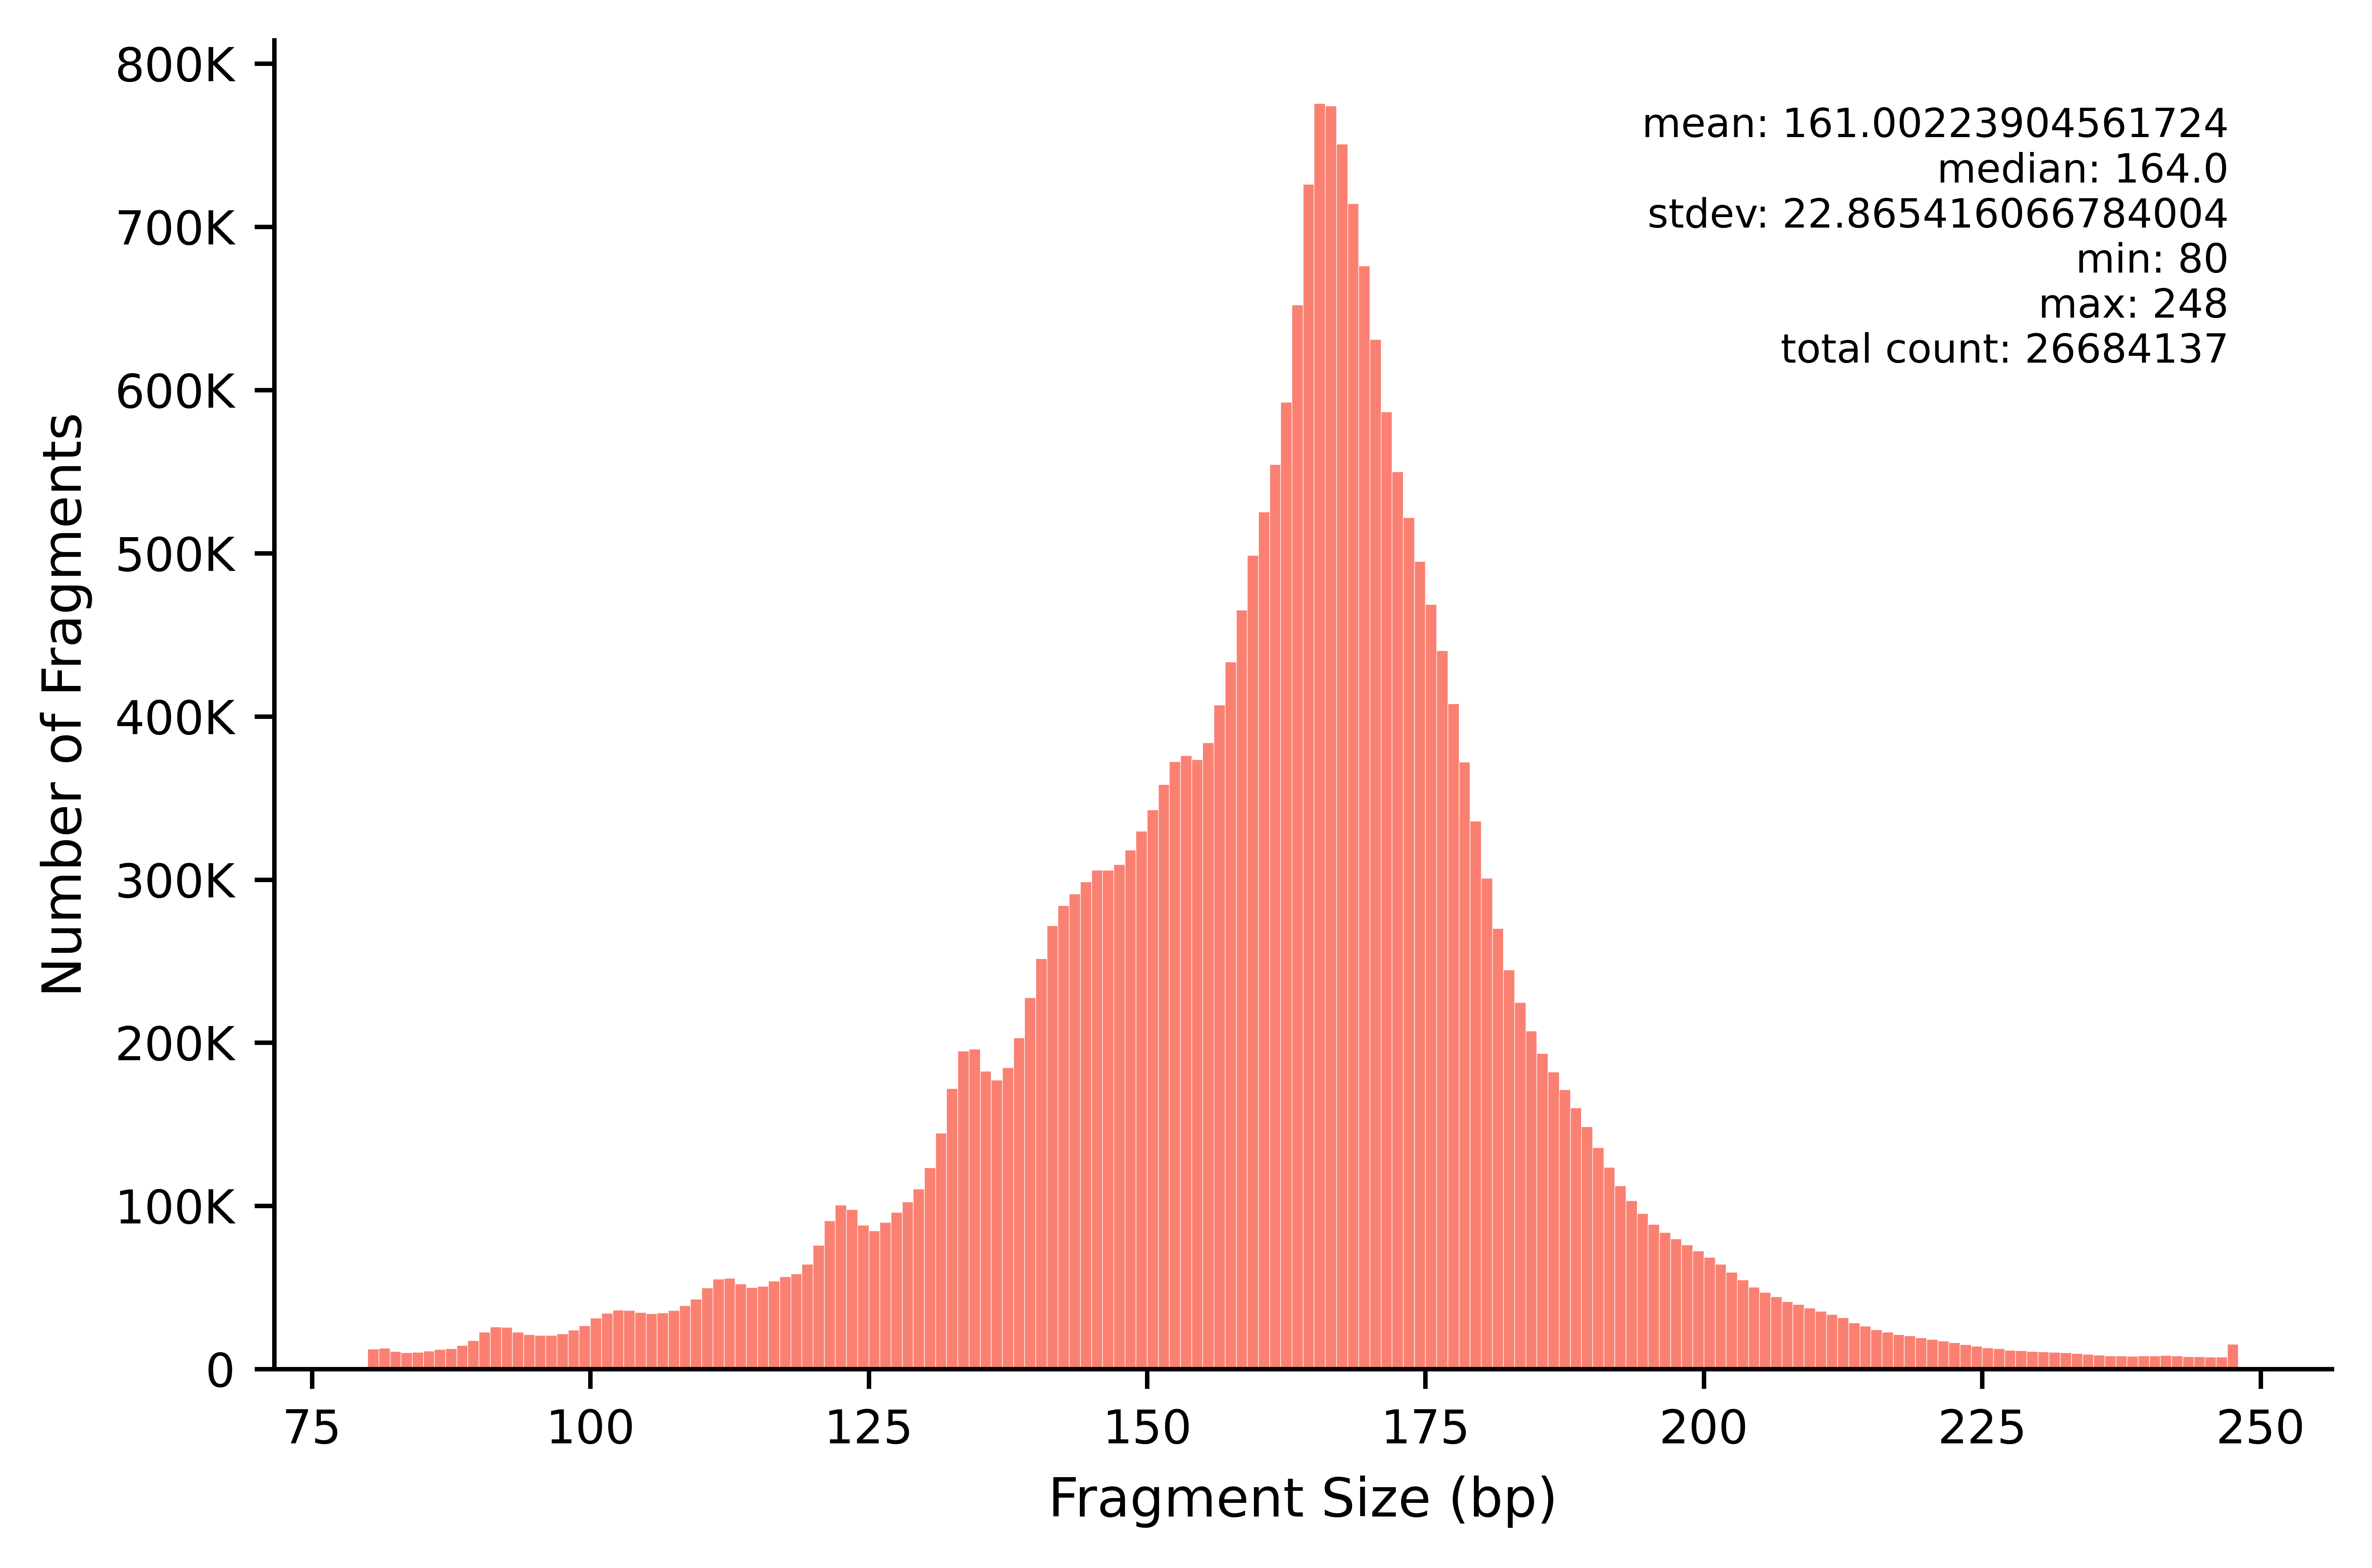

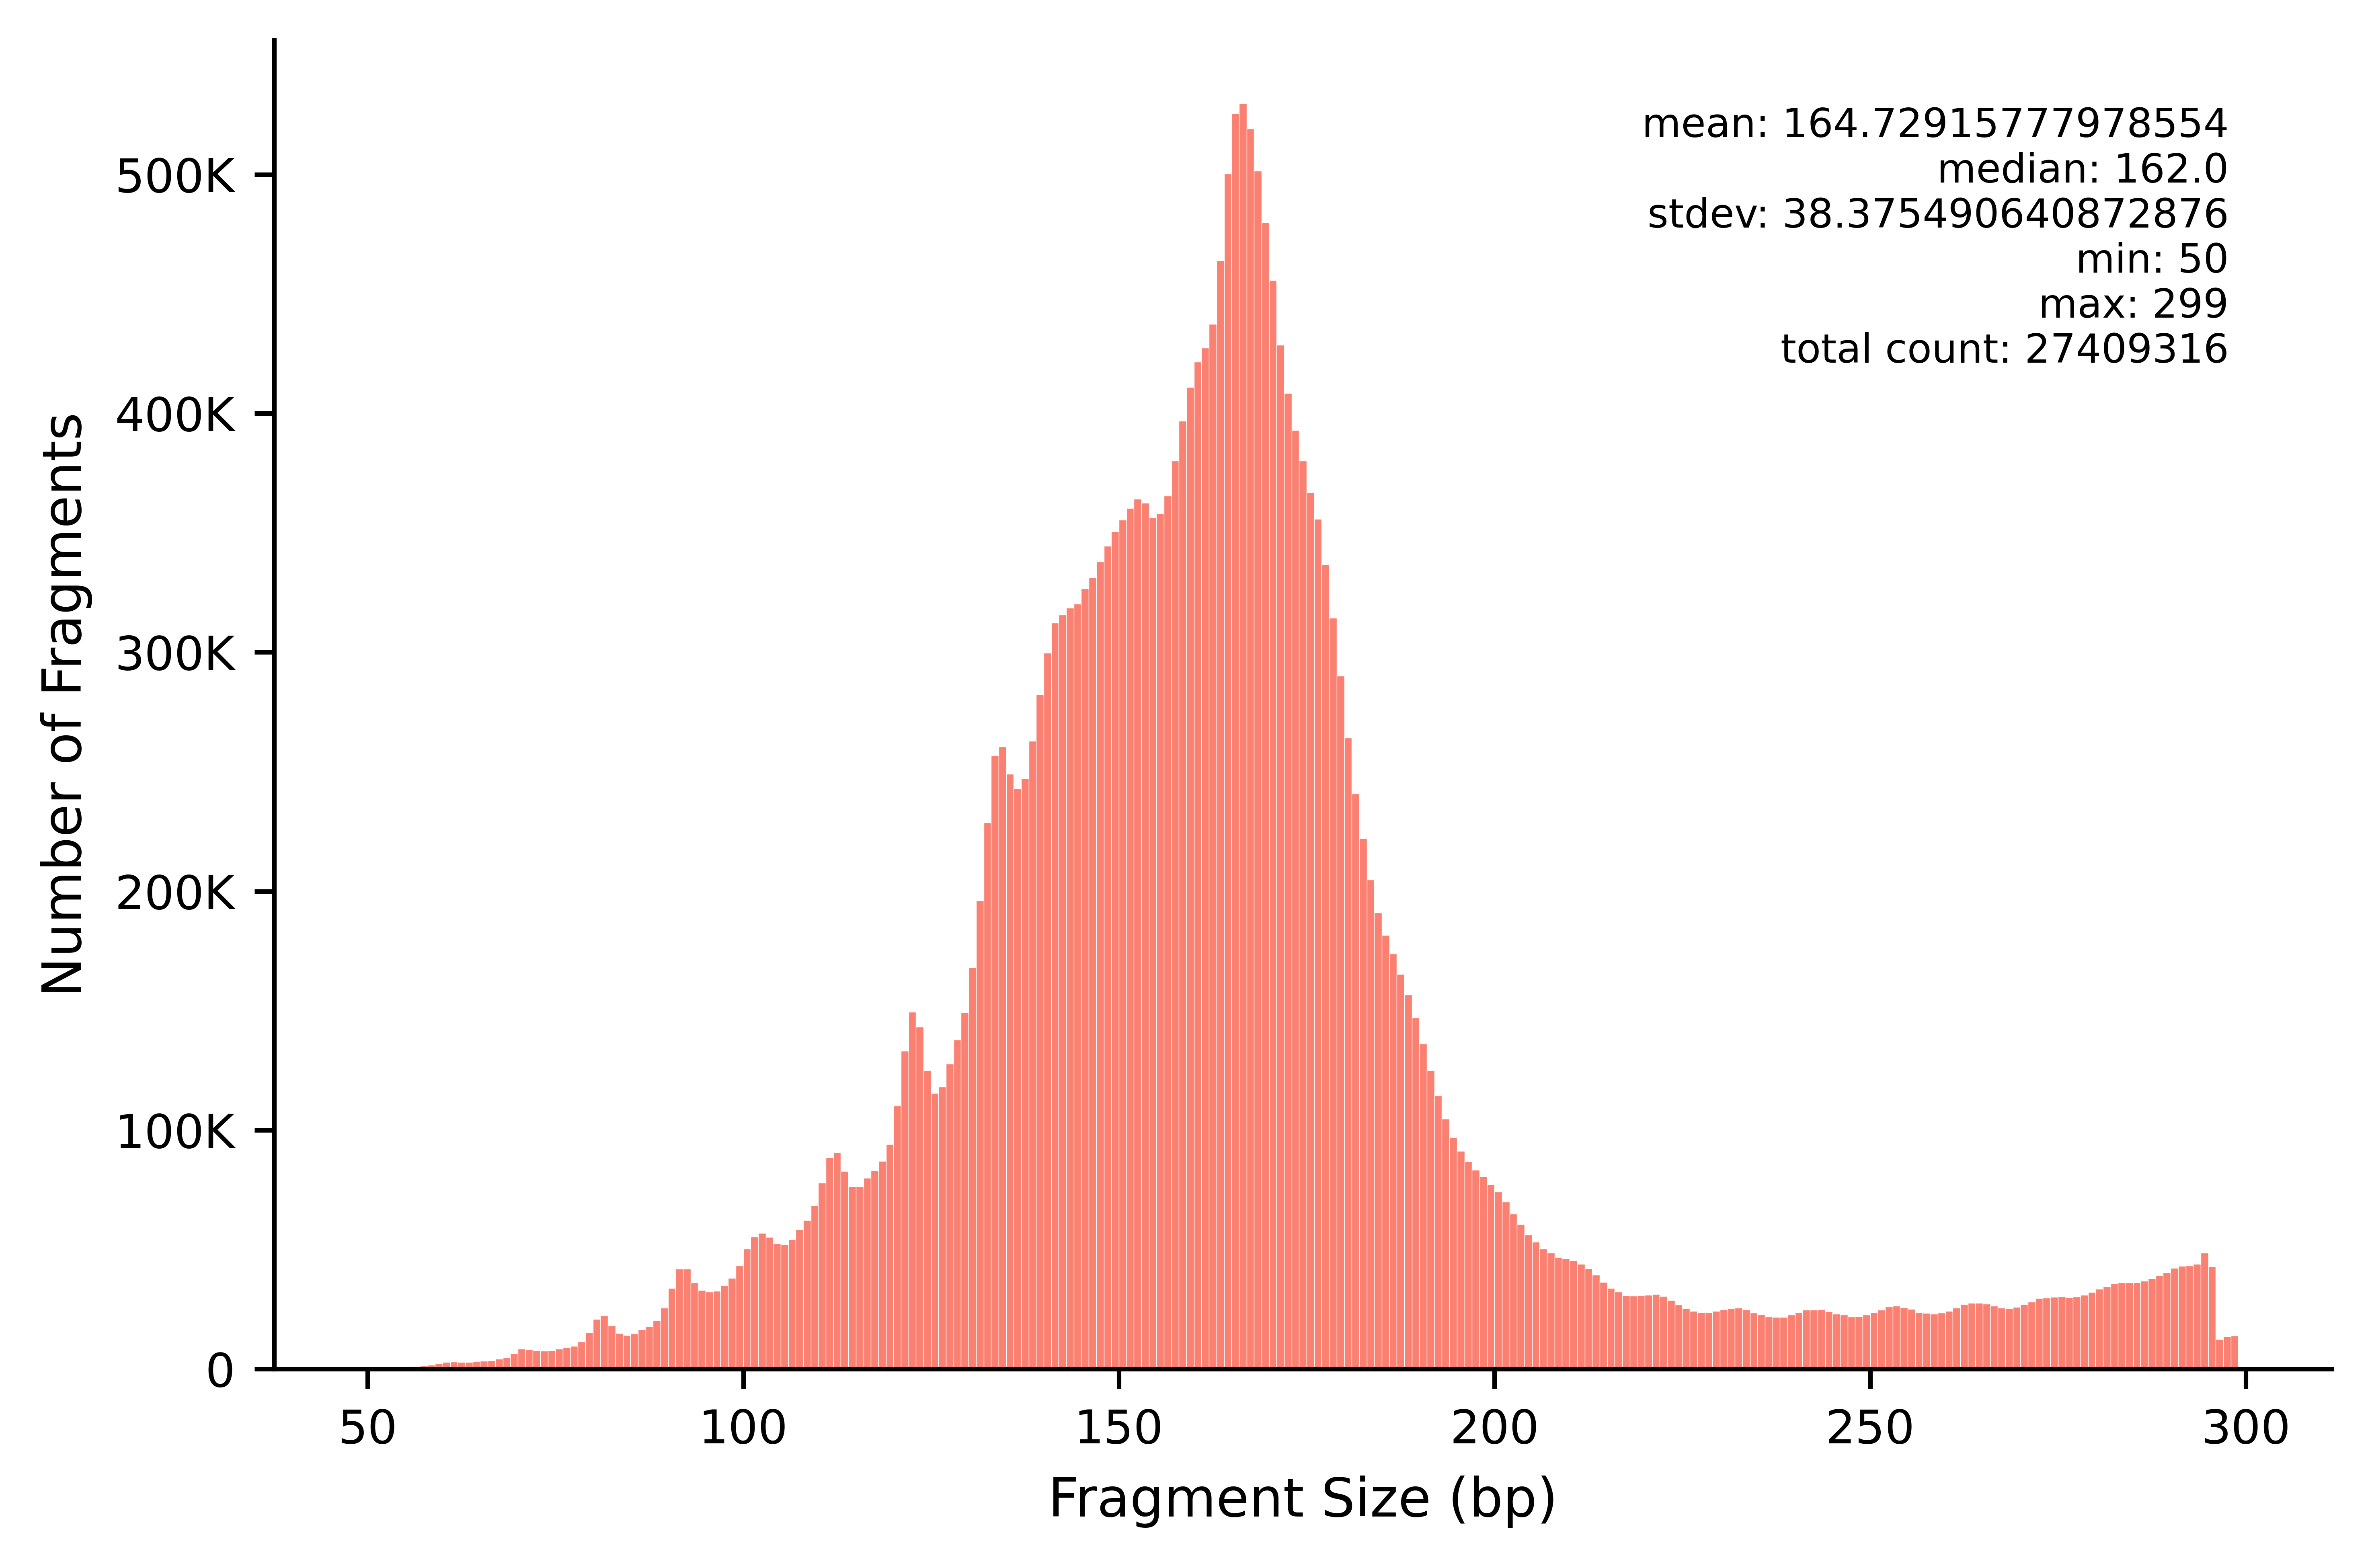

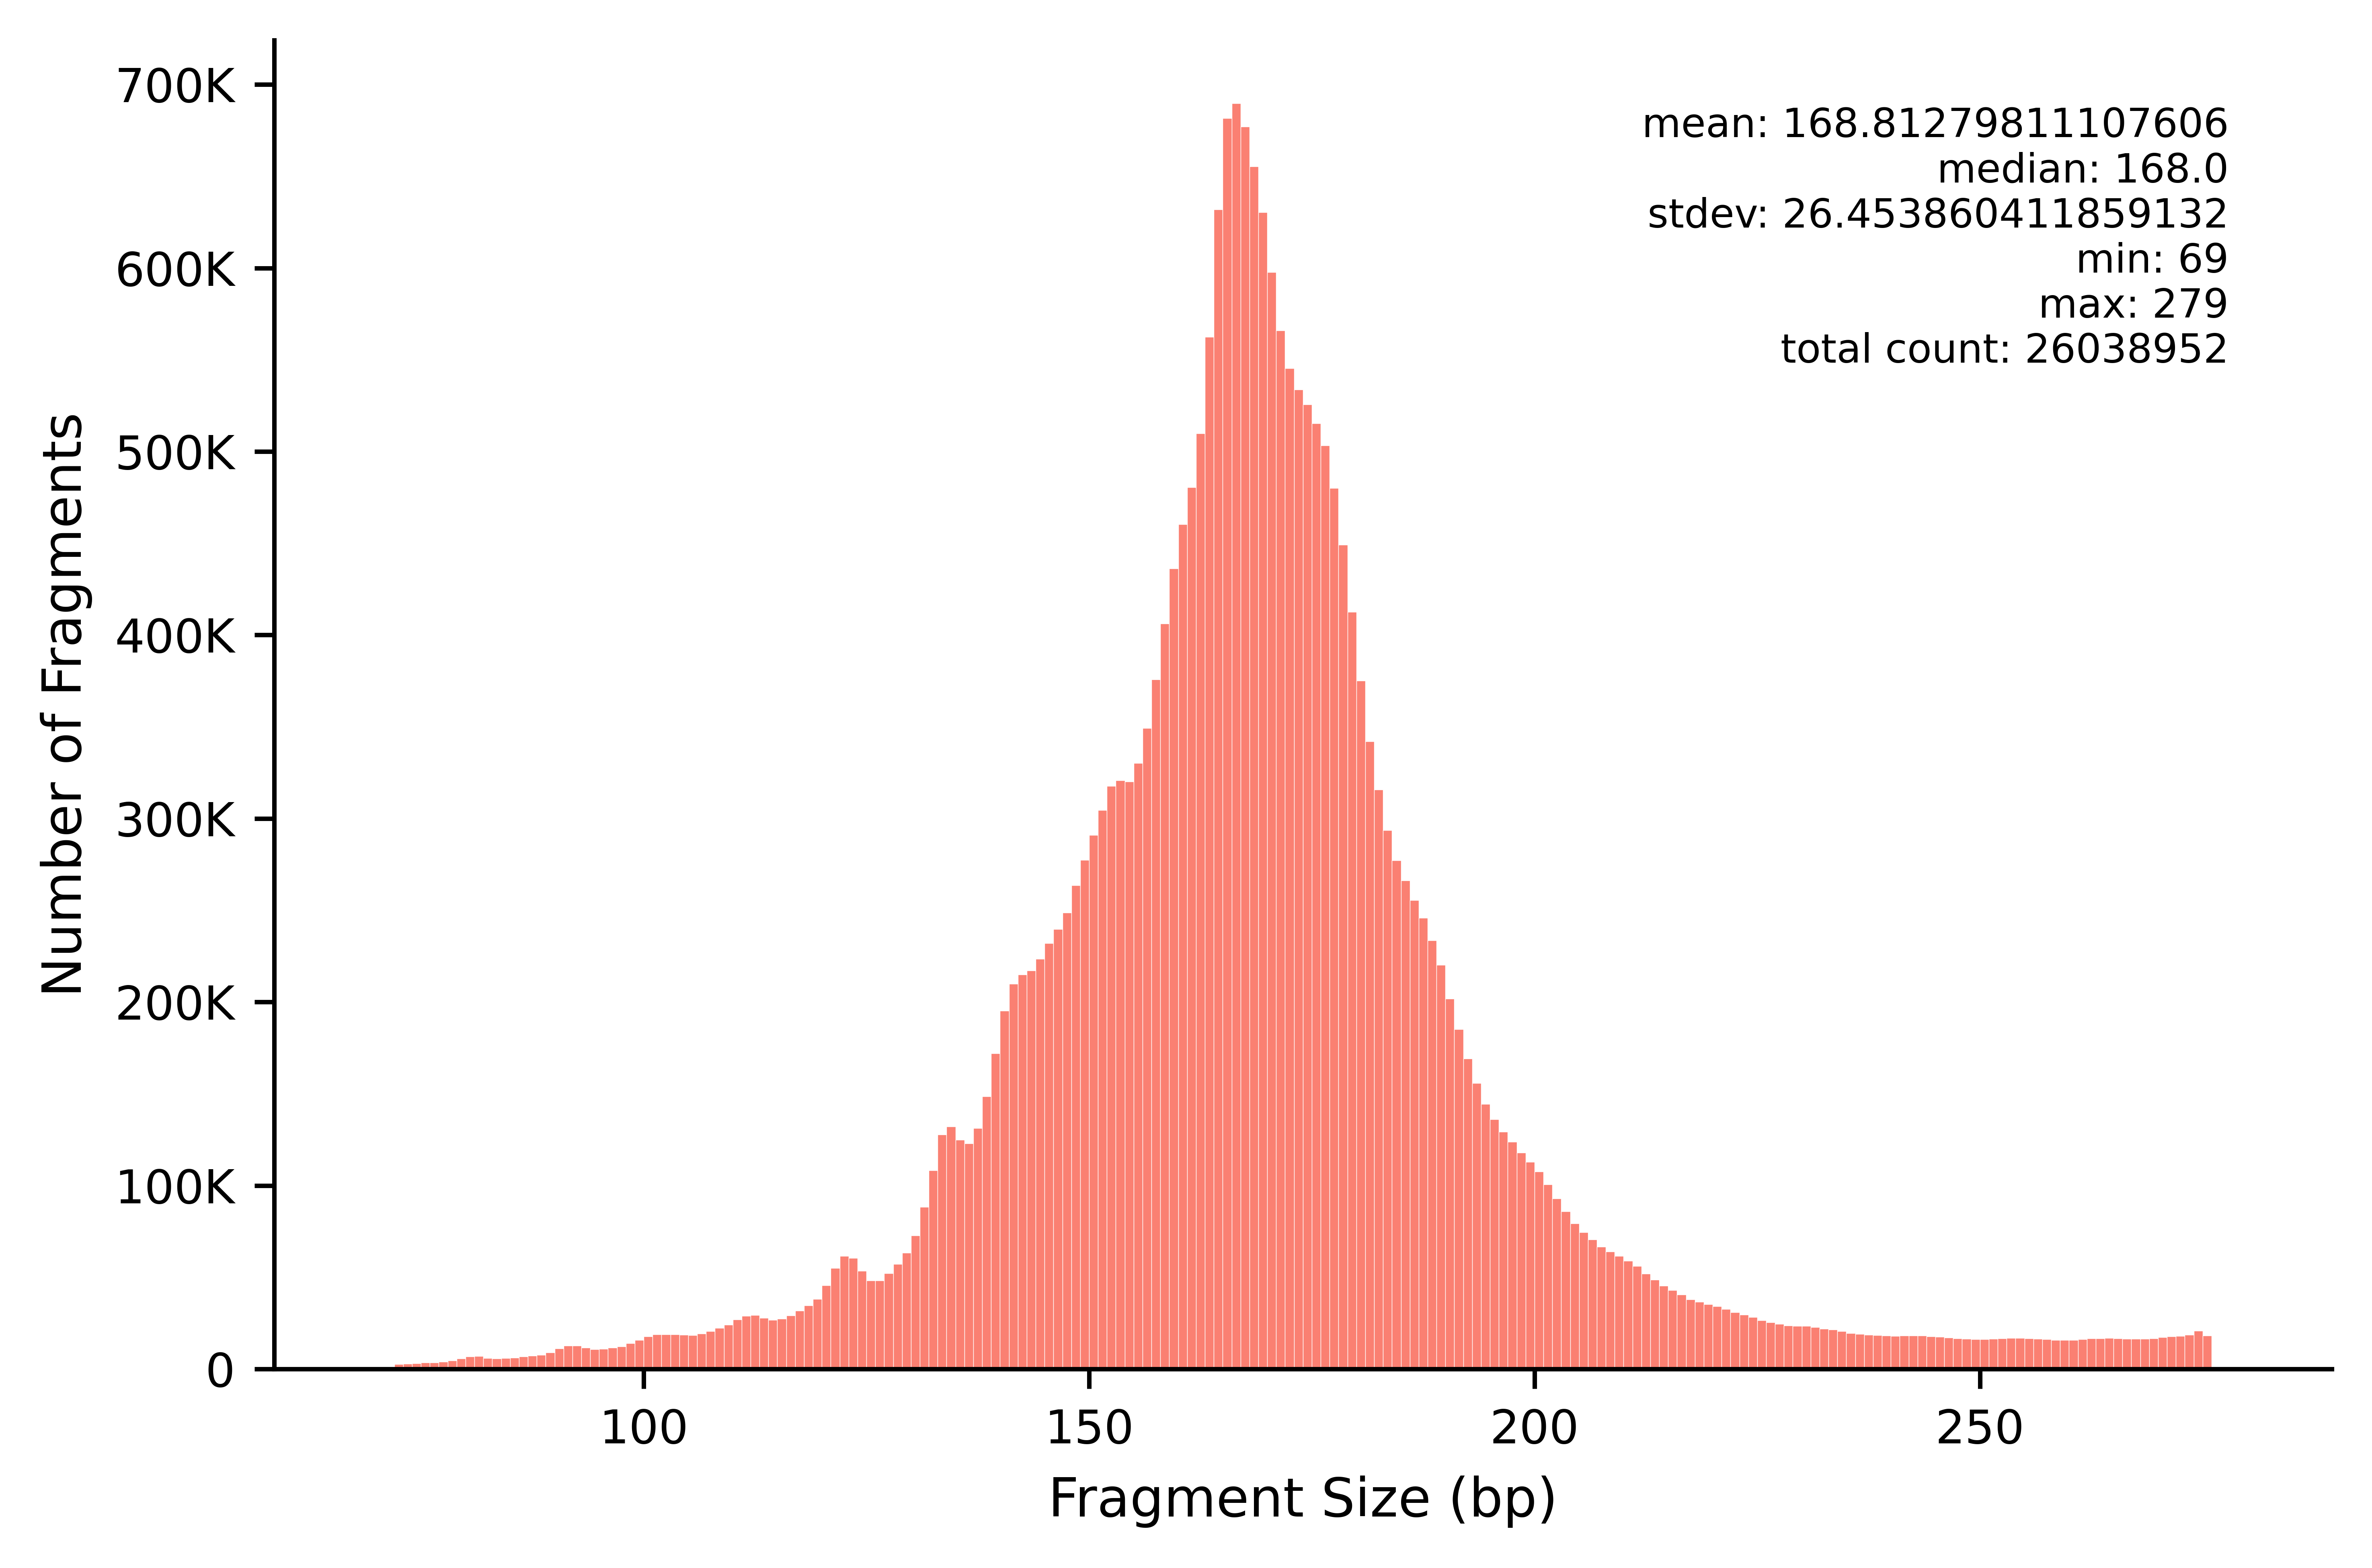

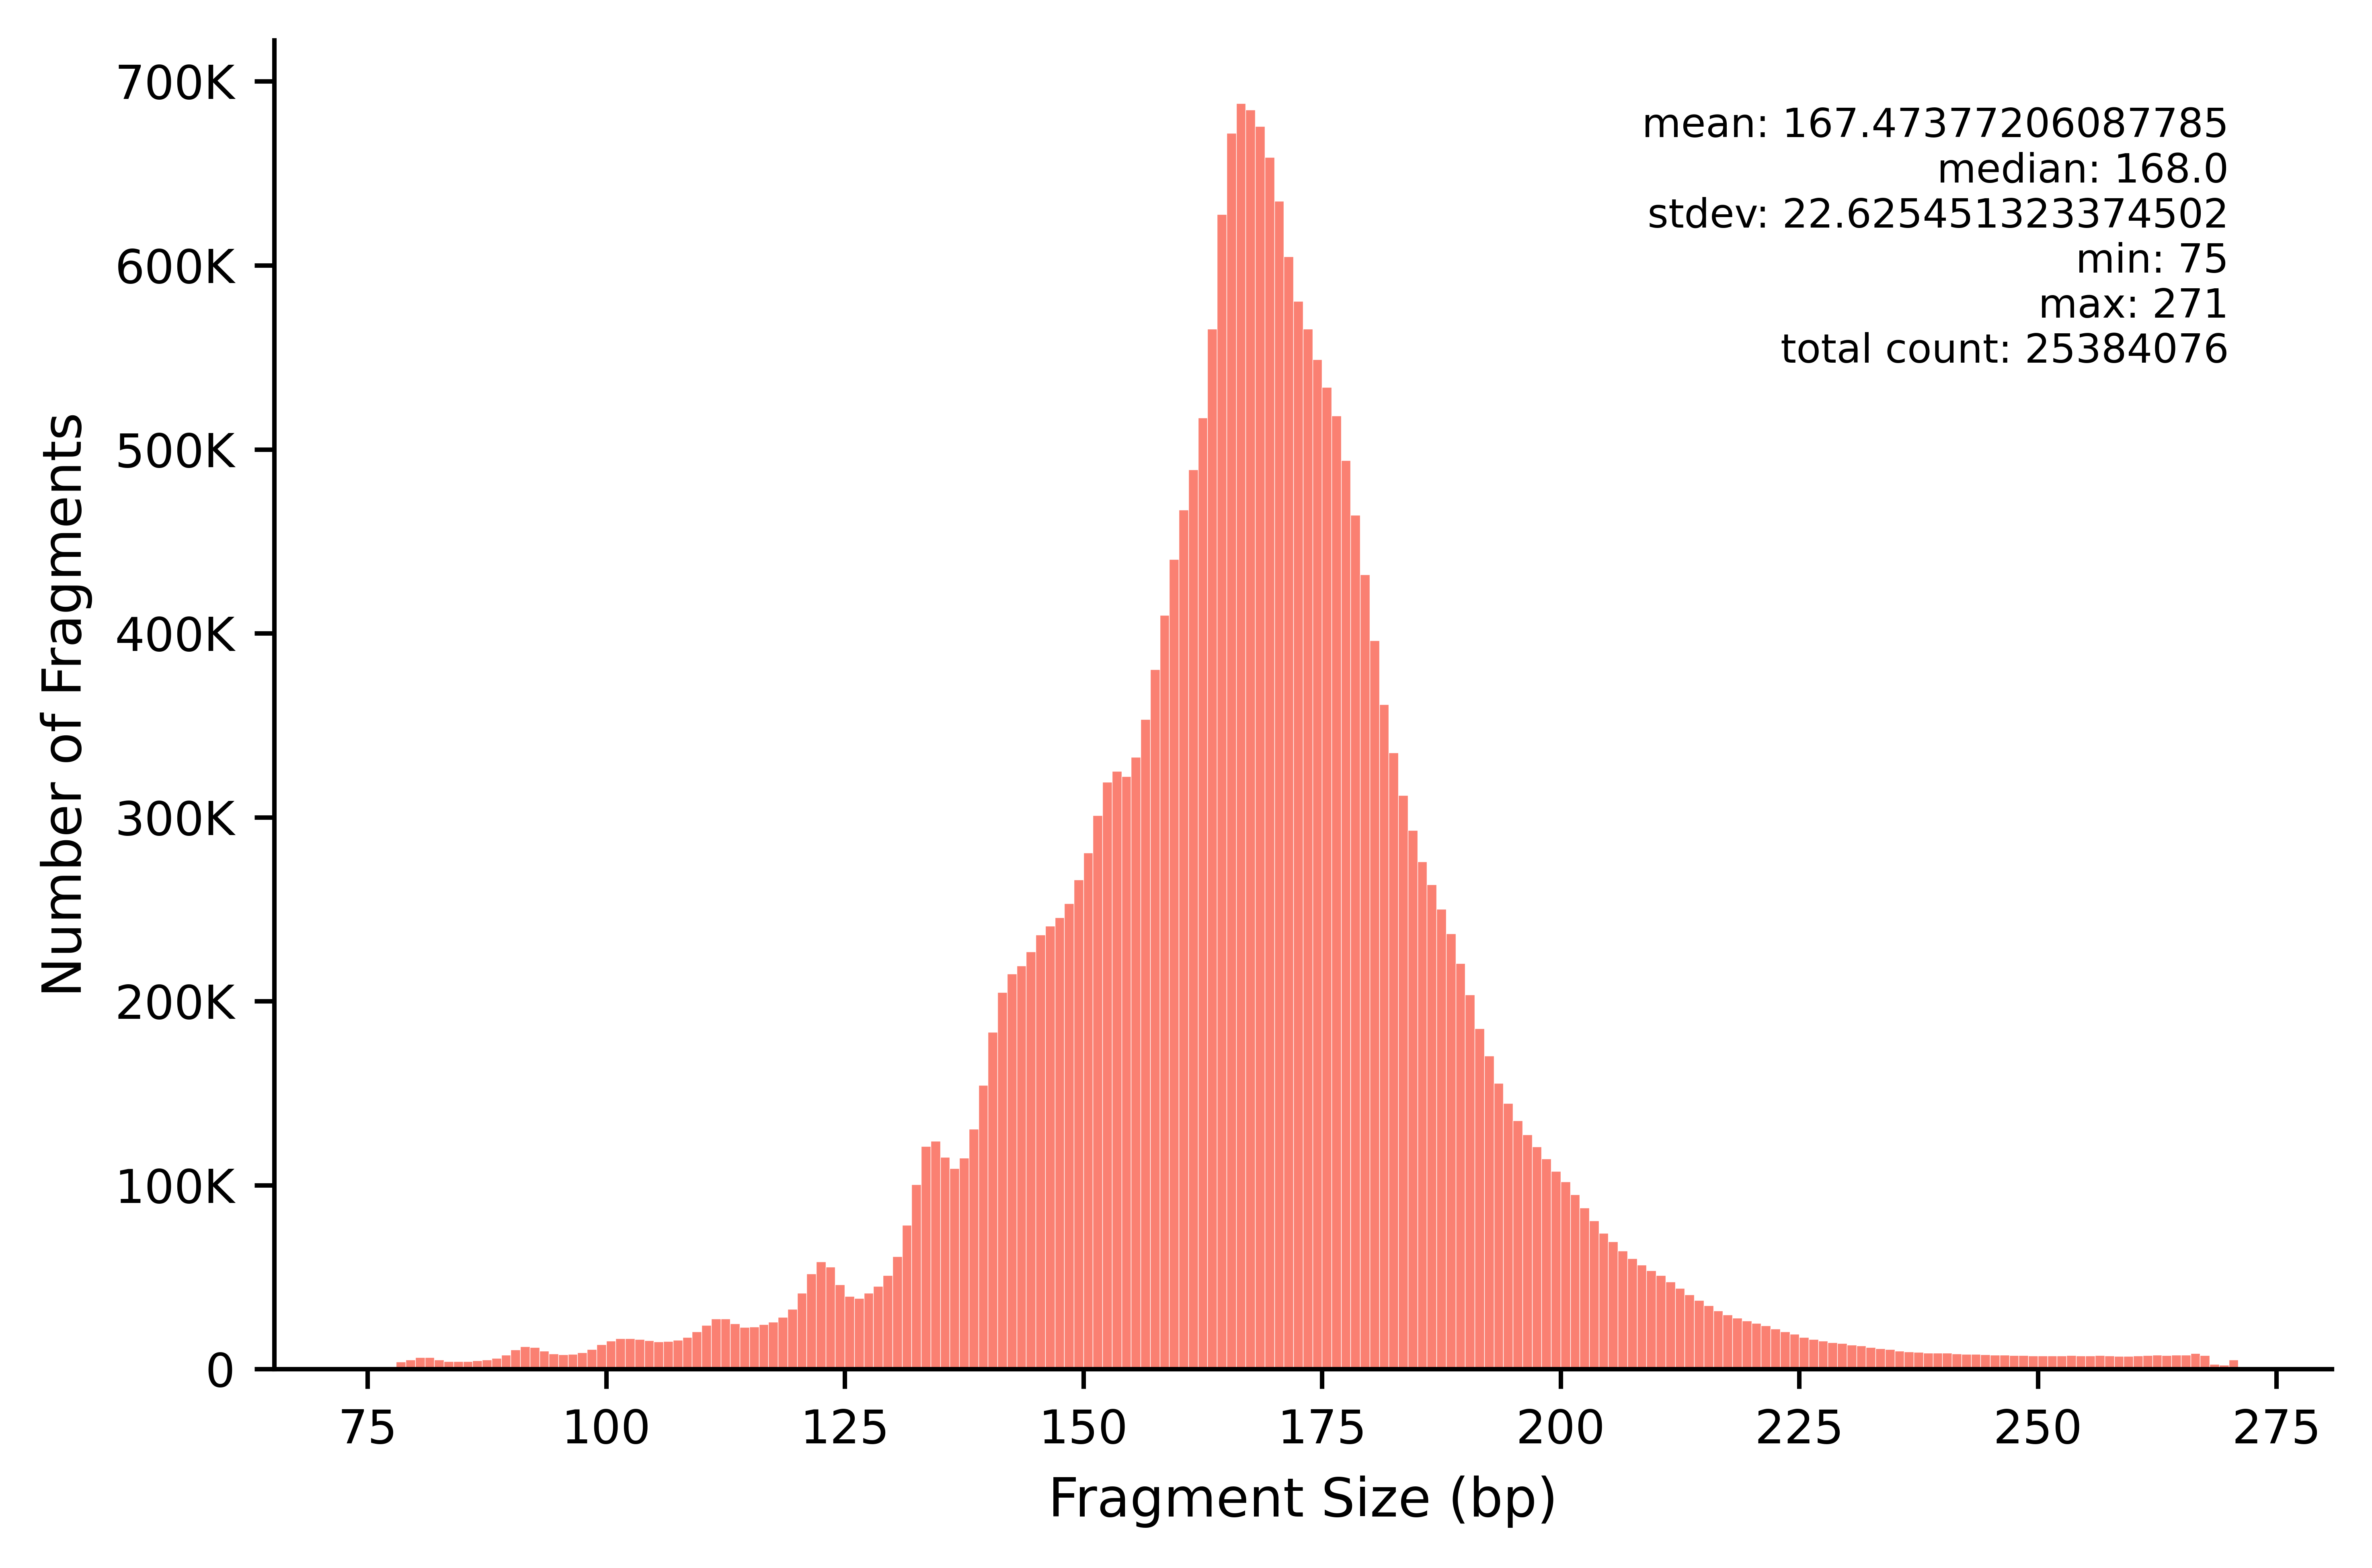

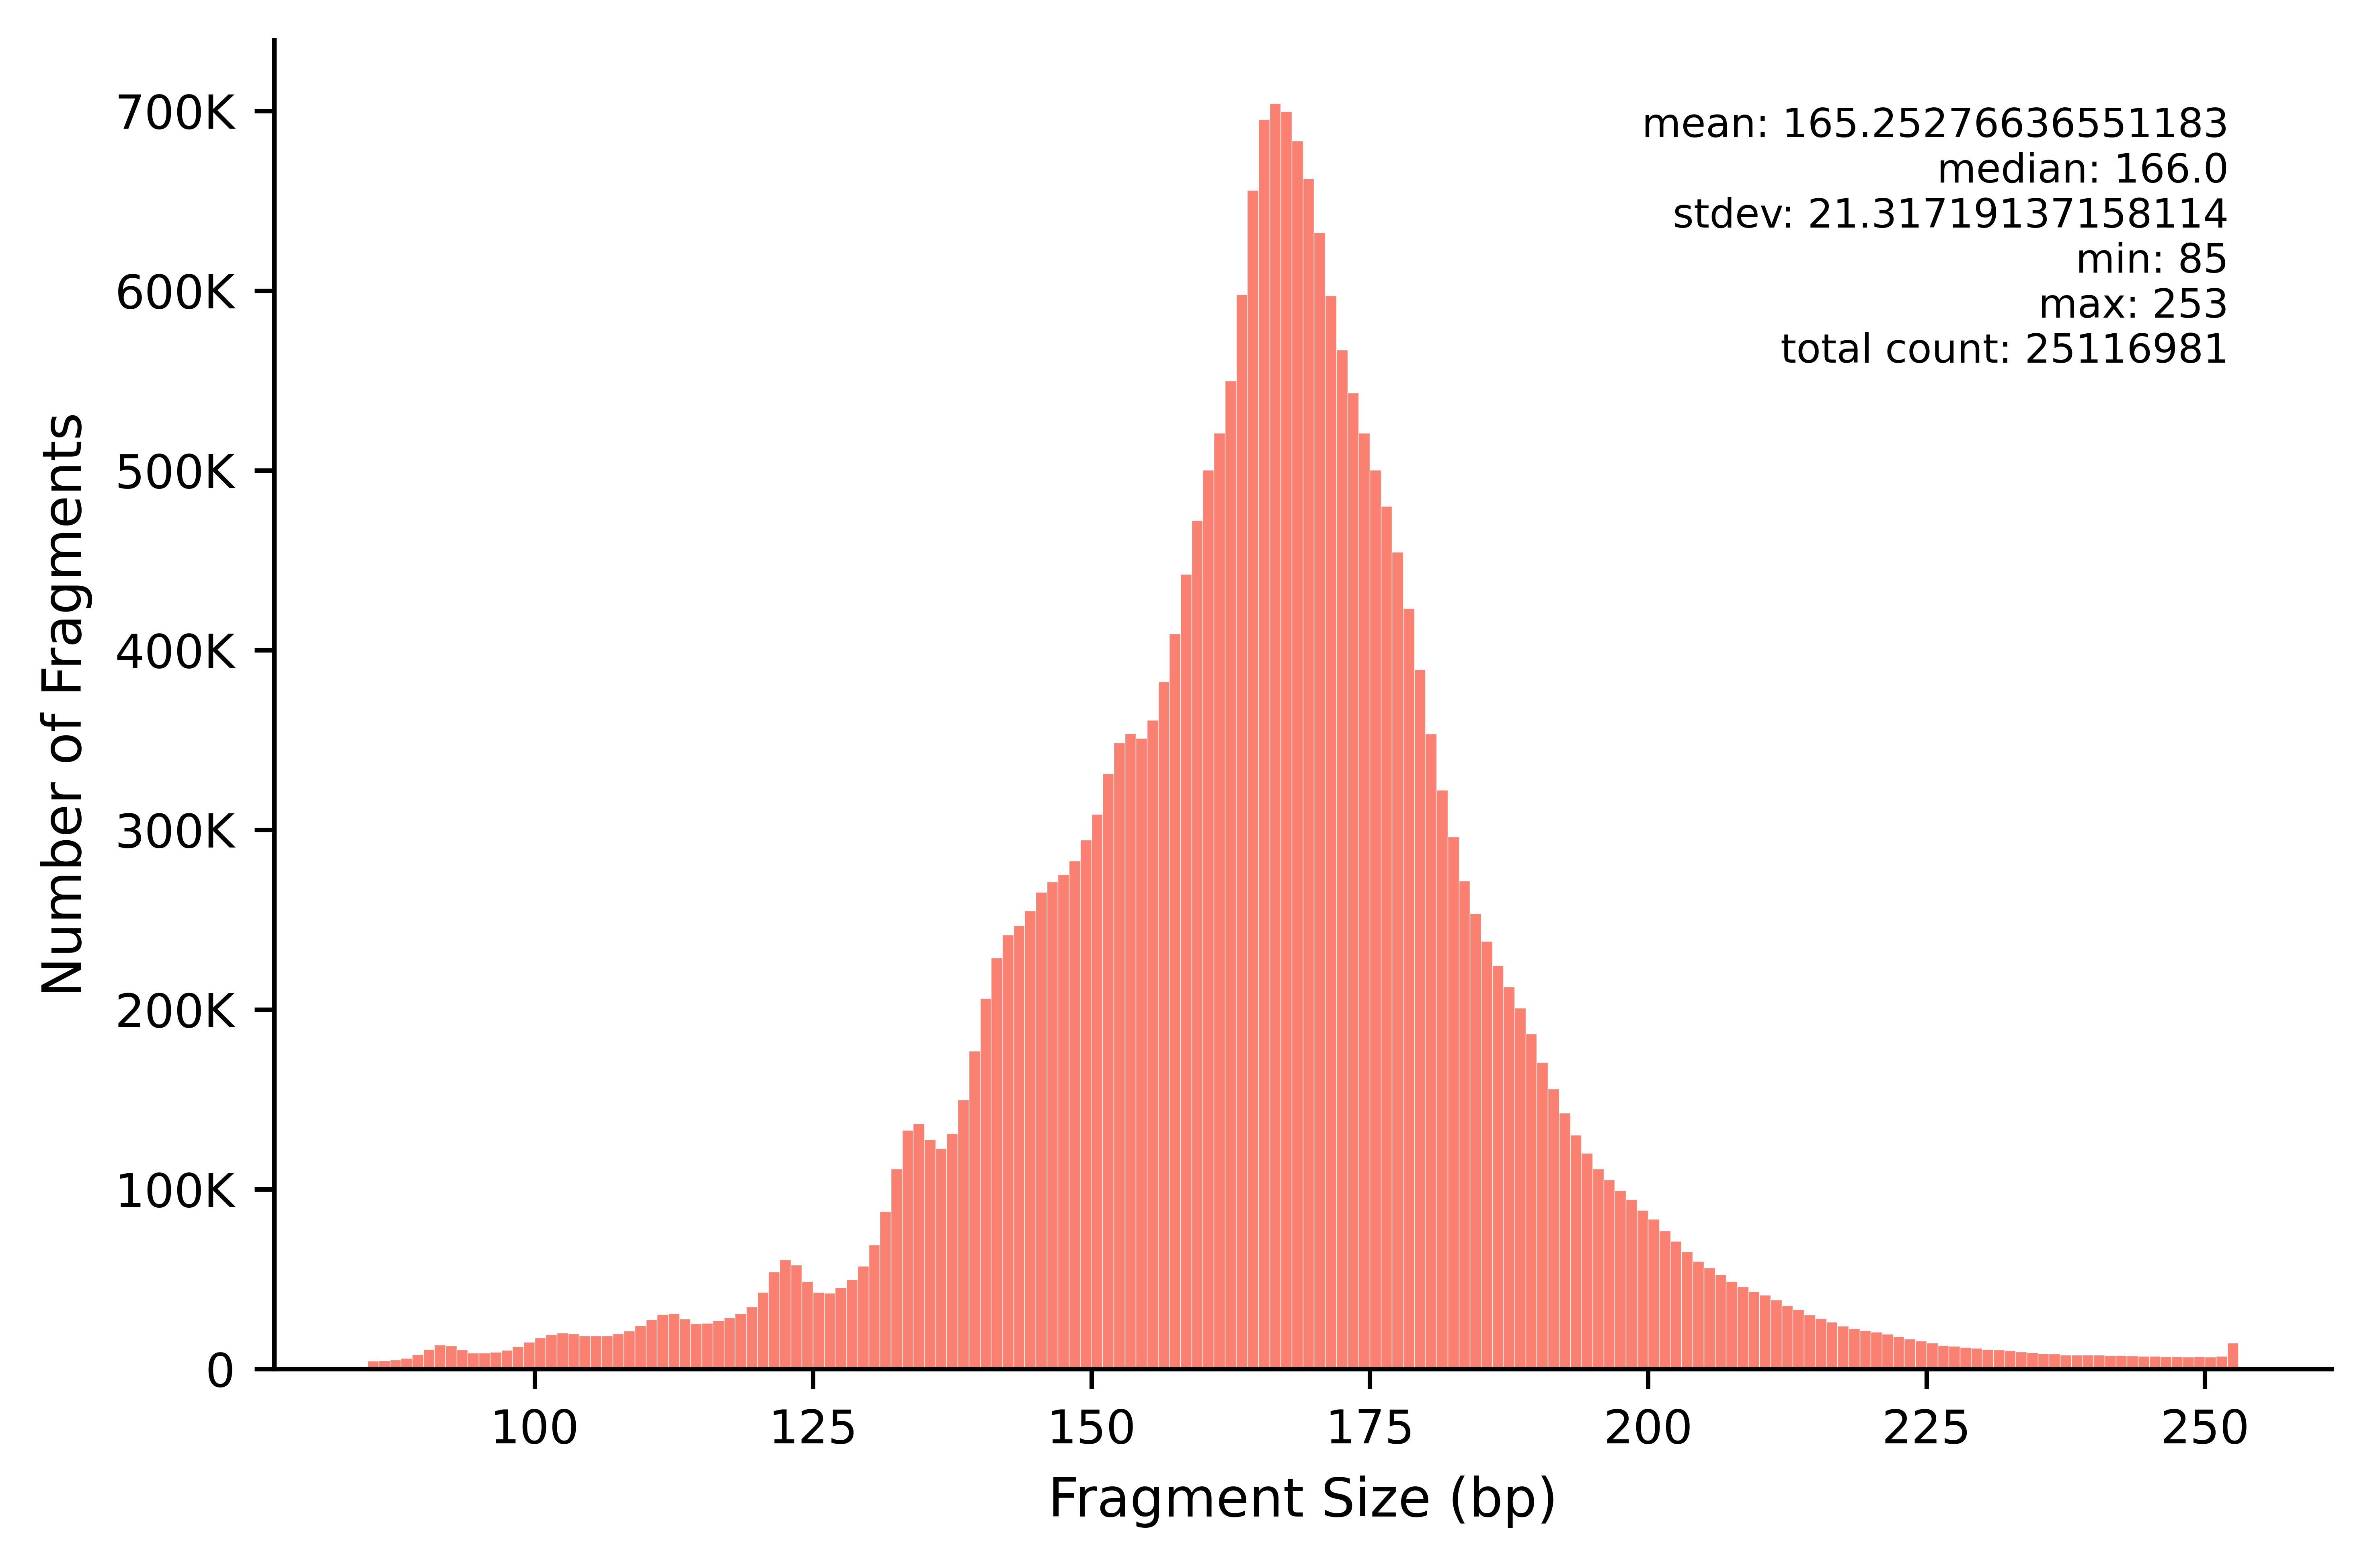

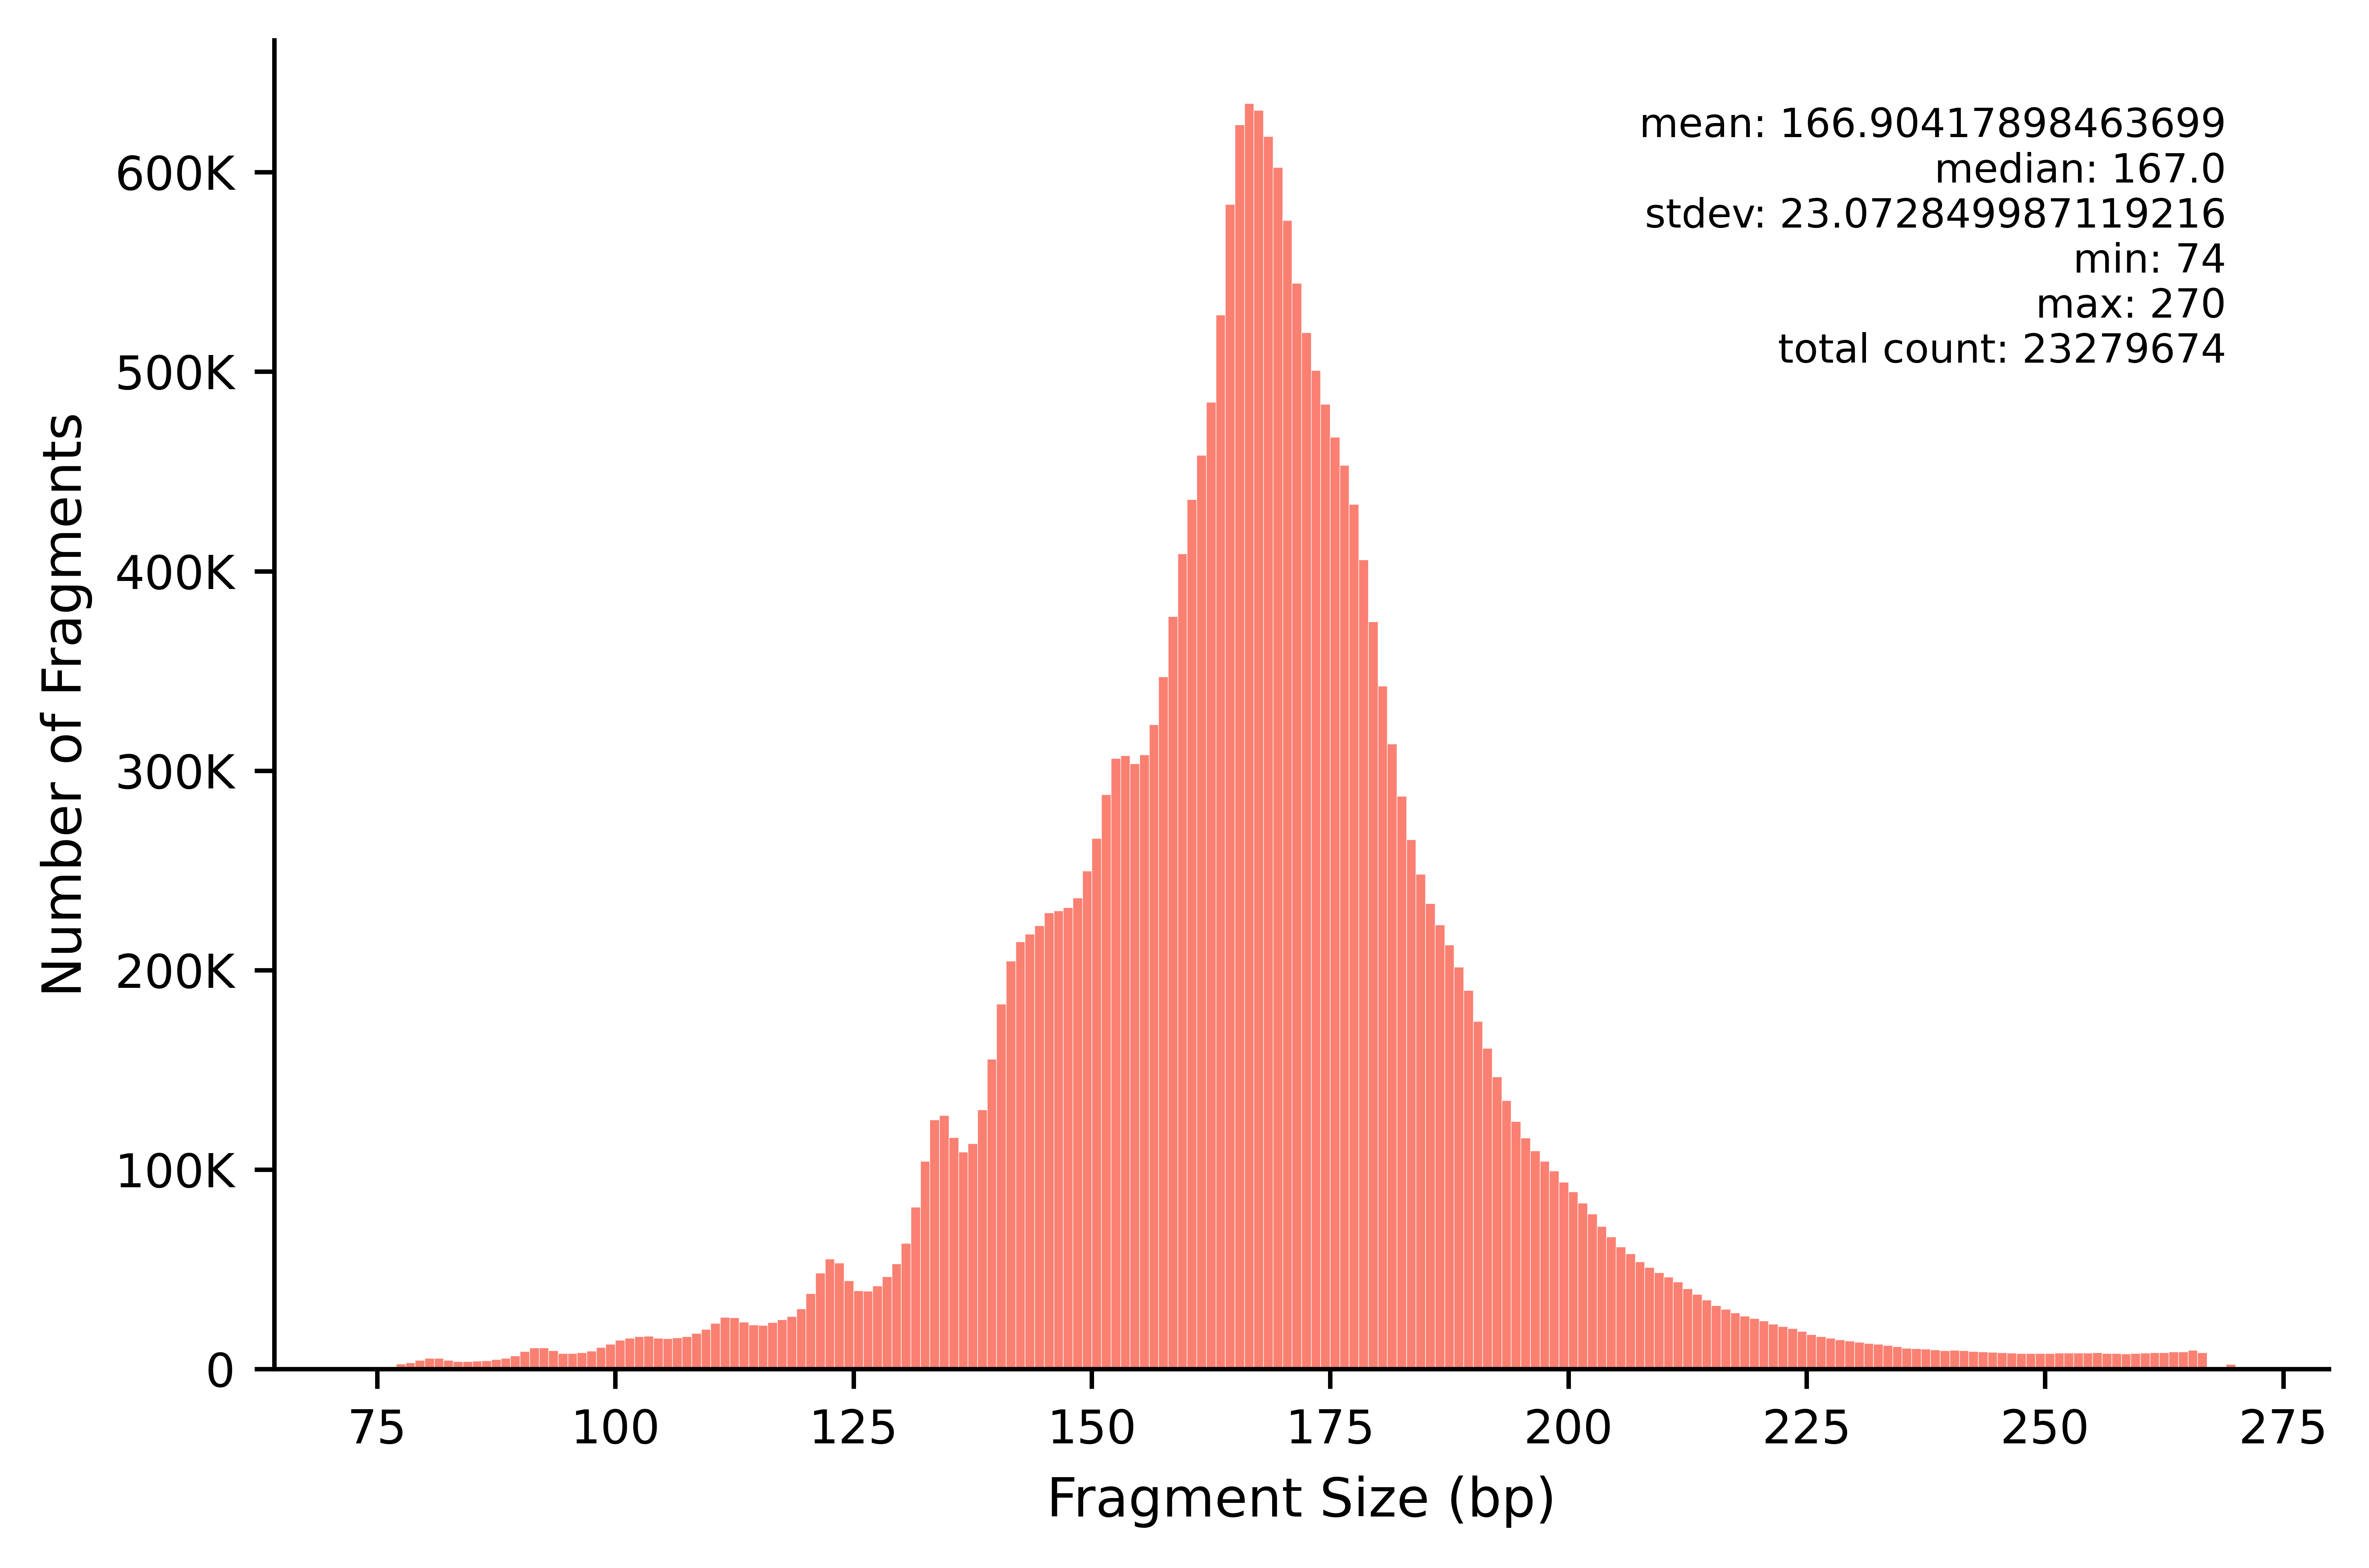

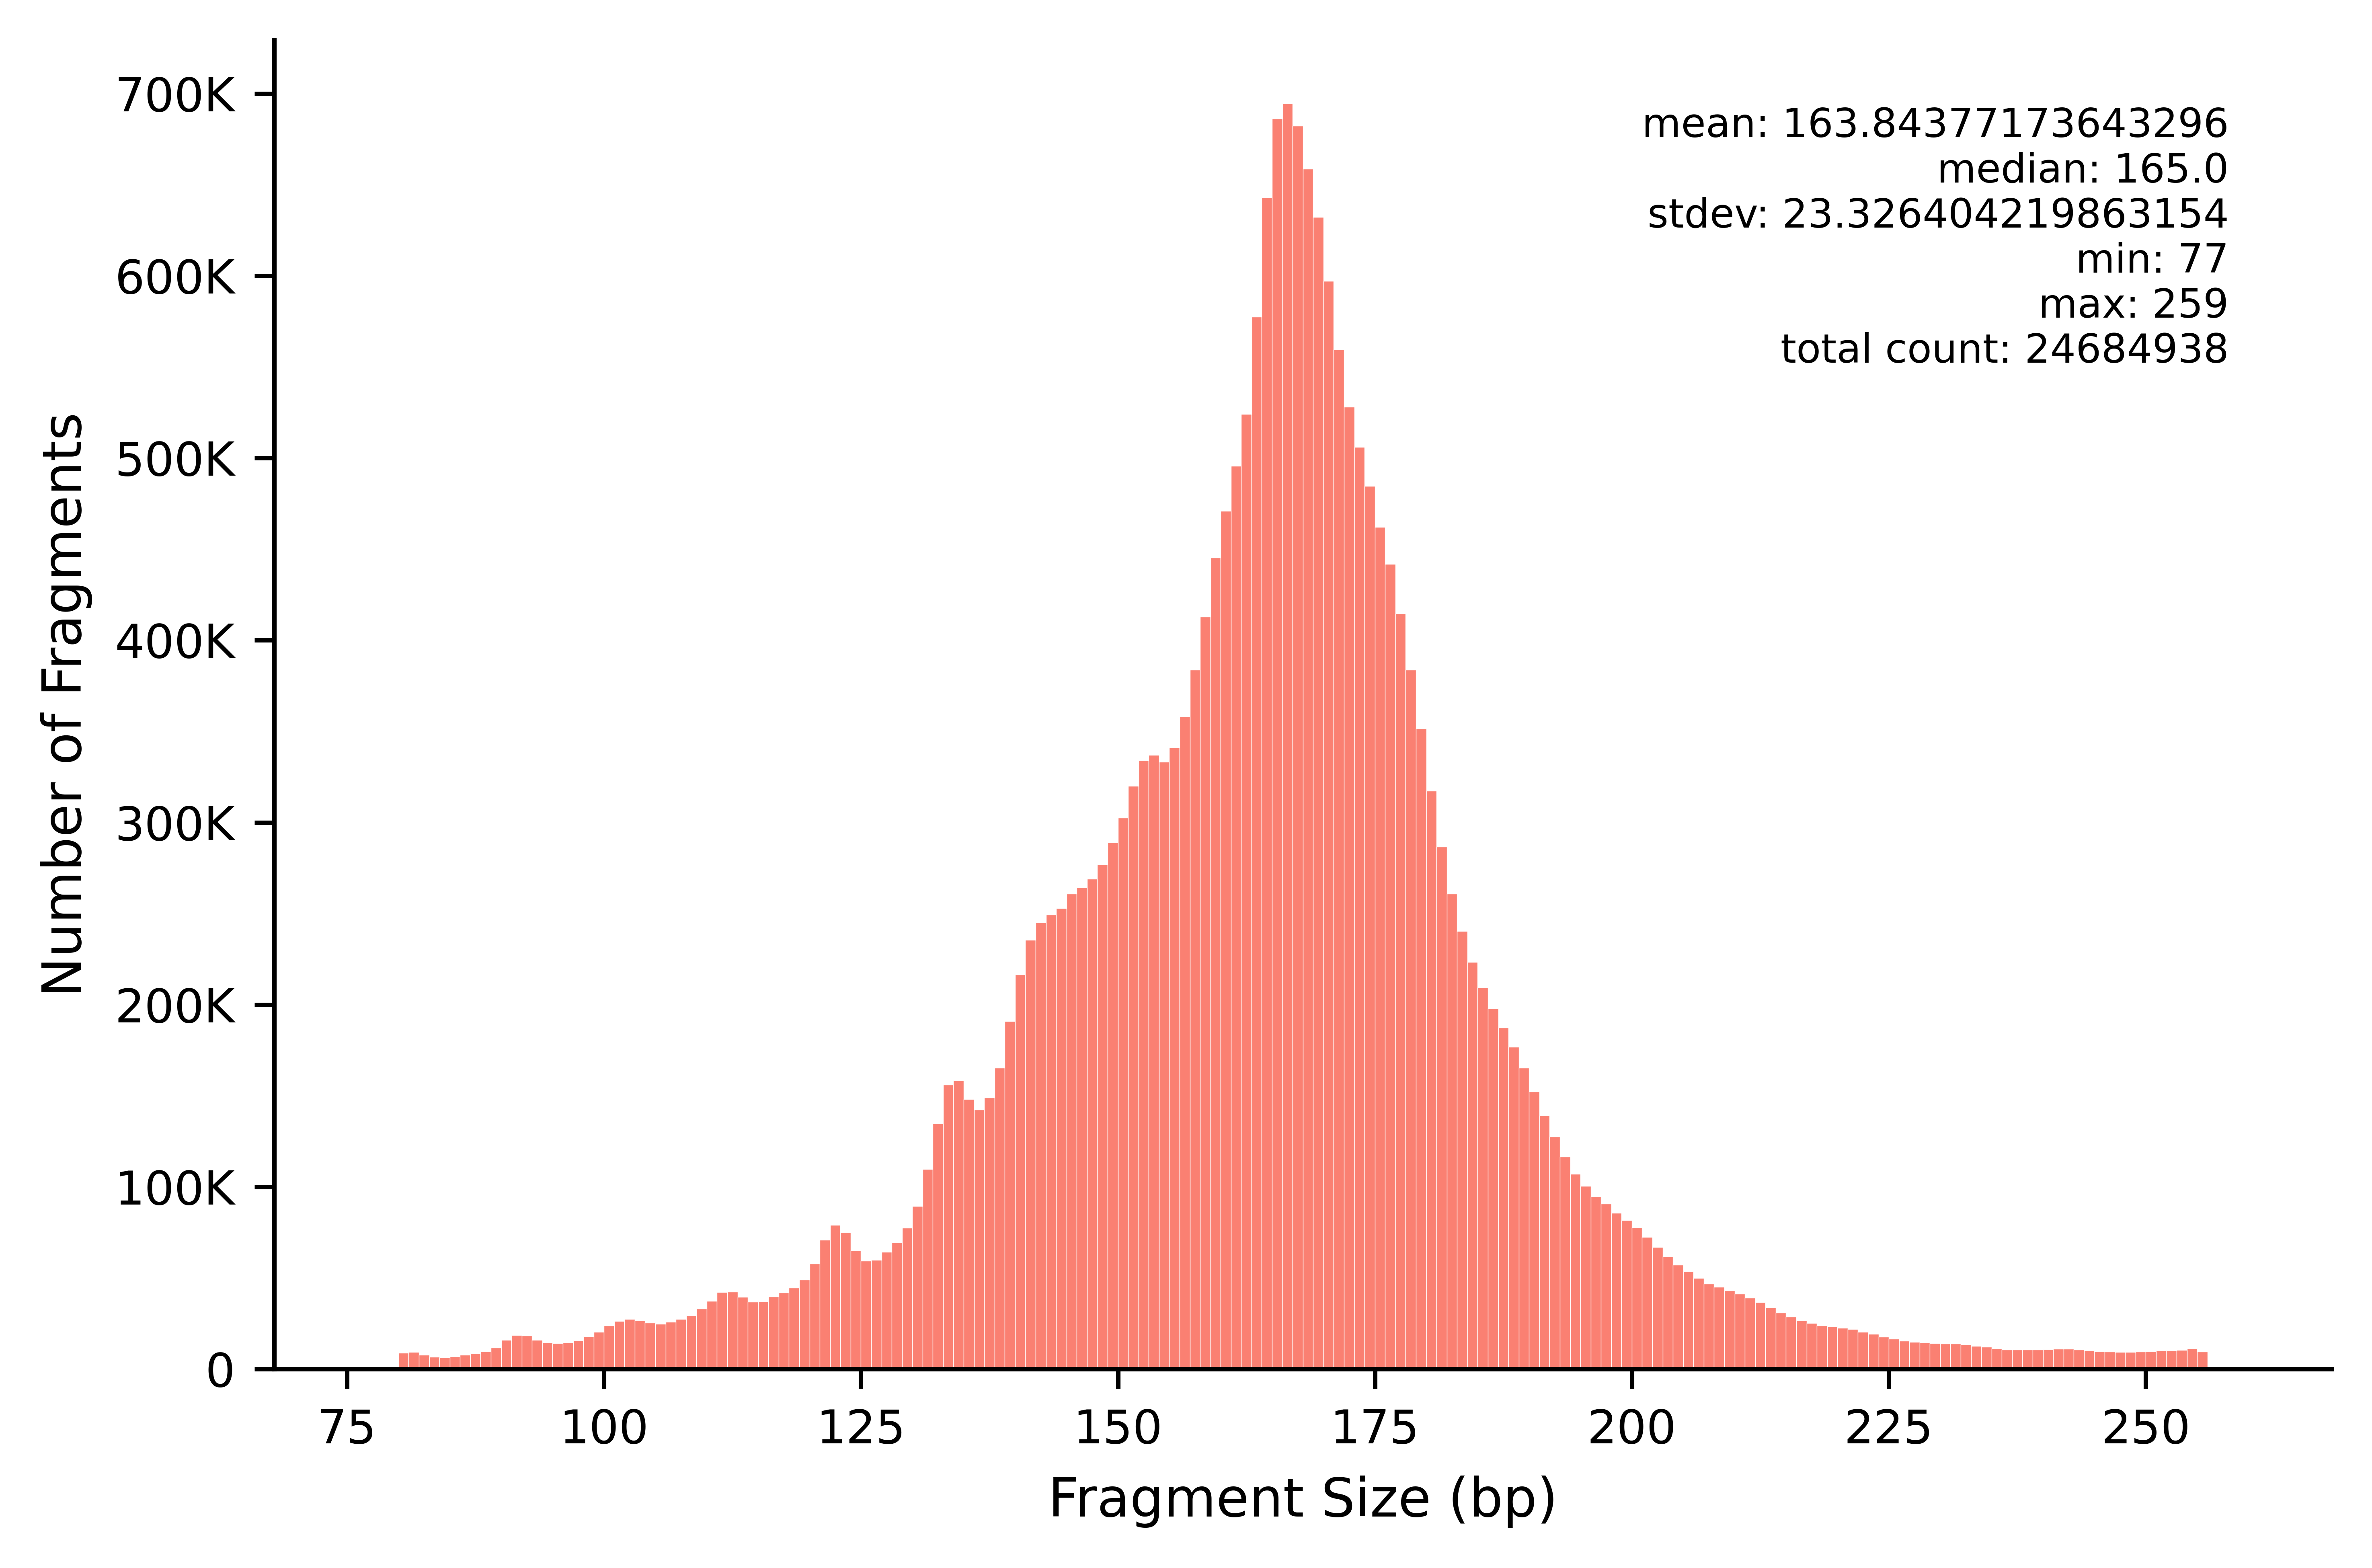

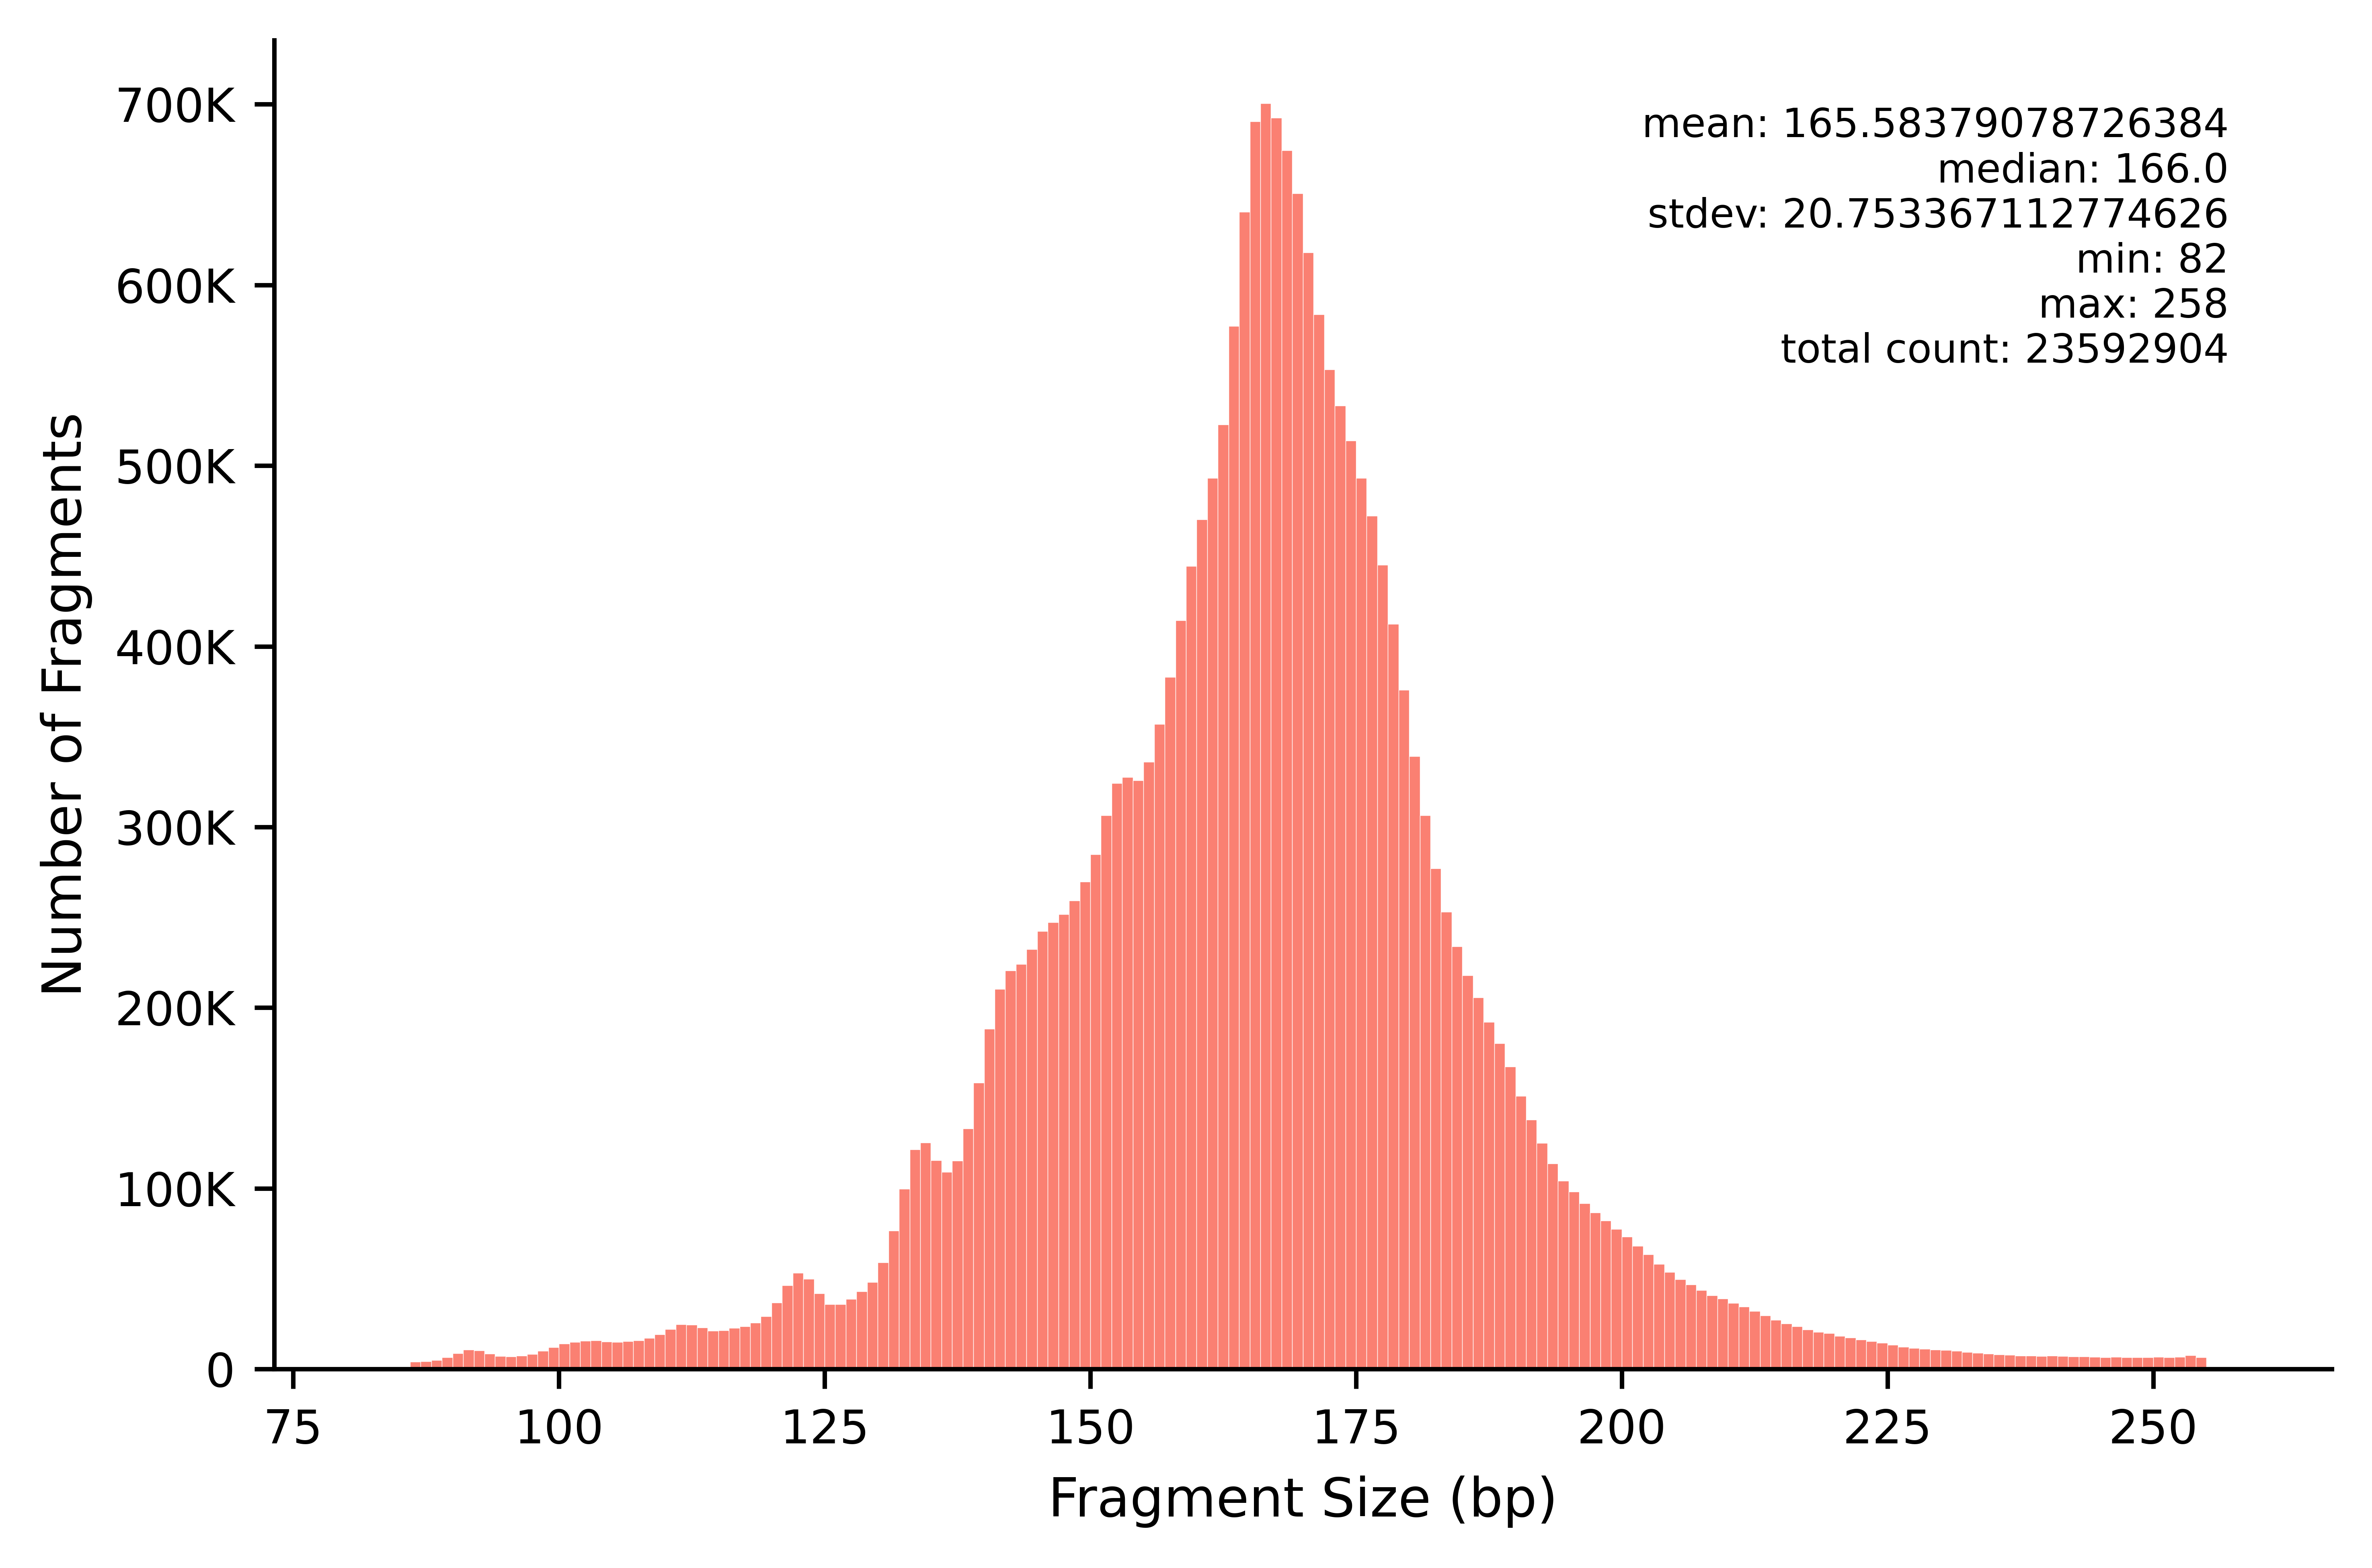

In [42]:
import glob
from finaletoolkit.frag import frag_length_bins 
for filename in glob.glob("../data/alignments/POOL-527N/*.markdup.bam"):
    #print(os.path.basename(filename)) # basename extrae filename del filename
    # guardo samplename quitando la extension
    samplename = os.path.basename(filename).replace(".markdup.bam", "")
    print(samplename)
    frag_length_bins(input_file=filename,
                     bin_size=1,
                     min_length=50, 
                     max_length=300,
                     quality_threshold=30,
                     output_file=os.path.join(results_filesdir, samplename + ".tsv"),
                     histogram_path=os.path.join(results_plotdir, samplename + ".png")
                    )

In [44]:
pngfiles = glob.glob(os.path.join(results_plotdir + "*.png"))
print(pngfiles)

[]


In [ ]:
pngfiles = glob.glob(os.path.join(results_plotdir + "*.png"))

# defino panel 
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# iteramos en axis e imagenes
for ax, img_path in zip(axes, pngfiles):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis("off")  # no ticks or frames

    # saco el nombre
    fname = os.path.basename(img_path)

    # cogo lo de antes de .bam
    title = fname.split(".bam")[0]

    # Set the subplot title
    ax.set_title(title, fontsize=8)

# TO-DO

## Procesado de datos:
- [x] Run POOL-527N
- [ ] Running: POOL-473
- [ ] Run las demas
- [ ] repetir snakemake usando tool Agilent para sacar fastq con UMI (3ra read) y marcar duplicados con picard UMI-aware thingy (ver mail Ivan)
- [ ] script (o ver si hay funcion en Finaletoolkit) para QC bam files -> que todas las muestras limpias (ver regla frag anterior. Entre otras excluyando lecturas duplicadas) vayan a carpeta datos/ (y te quitas de iterar por POOLs que a estar alturas deberian darte igual porque no sabes que es que)

## Resultados:
- [ ] Histogram fragmentos overlap con dup vs sin dup-noUMI vs sin dup-UMI a ver como cambia.
- [ ] Anyadir a la comparacion anterior filtrando duplicados UMI-aware
- [ ] (50%) Automatizar generar .tsv y visualizaciones (primero decidir cuales son importantes)  

## Otros:
- [ ] completar snakefile con regla bcl2fastq
- [ ] end motifs
- [ ] actualizar readme con como instalar y hacer el pipeline desde Illumina -> notebook? outputs?